In [33]:
import streamlit as st
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.style as style
from datetime import date
import matplotlib.dates as dates
from matplotlib.dates import MonthLocator, DateFormatter, WeekdayLocator
from matplotlib.ticker import NullFormatter
import seaborn as sns
from urllib.request import urlopen
import json 
from pandas.io.json import json_normalize
import pandas as pd
import requests
from matplotlib.figure import Figure
from bs4 import BeautifulSoup
import requests
import bs4
import numpy as np
from urllib.request import urlopen
import yfinance as yf
import datetime
from scipy import stats
import base64
from io import BytesIO
import numpy
import time
import hashlib

# Web Scrapping

In [63]:
text='screener.in'+'MRF'
url = 'https://google.com/search?q=' + text
request_result=requests.get( url ) 
soup = BeautifulSoup(request_result.text,"lxml") 

s=''
for i in range(7,len((soup.select('.kCrYT a')[0]).get('href'))):



    if (soup.select('.kCrYT a')[0]).get('href')[i]=='&':

        break

    s=s+(soup.select('.kCrYT a')[0]).get('href')[i]
s

arr_pl=['Mar 2011','Mar 2012','Mar 2013','Mar 2014','Mar 2015','Mar 2016','Mar 2017','Mar 2018','Mar 2019','Mar 2020','2021','2022','TTM']
arr_bl=['Mar 2011', 'Mar 2012','Mar 2013','Mar 2014','Mar 2015','Mar 2016','Mar 2017','Mar 2018','Mar 2019','Mar 2020','2021','2022','TTM']
arr_cfs=['Mar 2011','Mar 2012','Mar 2013','Mar 2014','Mar 2015','Mar 2016','Mar 2017','Mar 2018','Mar 2019','Mar 2020','2021','2022','TTM']

pl=pd.read_html(s)[1].set_index('Unnamed: 0')
bl=pd.read_html(s)[6].set_index('Unnamed: 0')
cfs=pd.read_html(s)[7].set_index('Unnamed: 0')
i=0
j=0
k=0

# Preparing Income Statement, Balance Sheet, and Cash Flow Statement


In [64]:
while pl.shape[1]<13:

    pl['new'+str(i)]=pl.iloc[:,-1]
    i+=1
while bl.shape[1]<13:
    bl['new'+str(j)]=bl.iloc[:,-1]
    j+=1
while cfs.shape[1]<13:
    cfs['new'+str(k)]=cfs.iloc[:,-1]
    k+=1

pl.columns=arr_pl
bl.columns=arr_pl
cfs.columns=arr_cfs

In [65]:
pl=pl.transpose()
reset_names=["Sales\xa0+","Expenses\xa0+",'Operating Profit','OPM%','Other Income\xa0+','Profit before tax','Net Profit']
l1=['sales','expenses','opt','opm','oi','pbt','pat']
x=0
for i in reset_names:
    pl.rename(columns={i:l1[x]},inplace=True)
    x=x+1

change_datatype=['sales','expenses','opt','oi','Interest','Depreciation','pbt','pat']

for i in change_datatype:
    pl[i] = pd.to_numeric(pl[i])

pl.rename(columns={'OPM %':'opm'},inplace=True)
bl=bl.transpose()
b_reset_names=['Share Capital\xa0+',"Reserves","Borrowings\xa0+",'Other Liabilities\xa0+','Total Liabilities','Fixed Assets\xa0+','CWIP',"Investments",'Other Assets\xa0+','Total Assets']
new_names=['sharecap',"Reserves", "Borrowings",'otl','tl','nfa','cwip',"Investments",'oa','ta']
for i in range(7):
    bl.rename(columns={b_reset_names[i]:new_names[i]},inplace=True)
bl.rename(columns={'ol':'otl'},inplace=True)
bl.rename(columns={'Other Assets\xa0+':'oa'},inplace=True)
bl.rename(columns={'Total Assets':'ta'},inplace=True)
cfs=cfs.transpose()
cfs_reset_names=['Cash from Operating Activity\xa0+','Cash from Investing Activity\xa0+','Cash from Financing Activity\xa0+','Net Cash Flow']
cf_new_names=['cfo','cfi','cff','ncf']
for i in range(4):
    cfs.rename(columns={cfs_reset_names[i]:cf_new_names[i]},inplace=True)

In [66]:
#Profit Loss/ Income Statement
pl

Unnamed: 0,sales,expenses,opt,opm,oi,Interest,Depreciation,pbt,Tax %,pat,EPS in Rs,Dividend Payout %
Mar 2011,7459,6635,824,11%,39,63,262,538,34%,358,842.94,6%
Mar 2012,9752,8942,810,8%,429,98,248,893,31%,619,1458.98,2%
Mar 2013,11964,10692,1272,11%,32,159,302,843,31%,579,1366.16,2%
Mar 2014,12248,10468,1780,15%,25,196,374,1235,35%,809,1906.58,2%
Mar 2015,13329,11384,1945,15%,63,232,424,1353,33%,908,2141.71,2%
Mar 2016,20179,15743,4437,22%,317,361,737,3656,31%,2509,5916.93,2%
Mar 2017,13412,10763,2649,20%,327,257,611,2109,30%,1486,3504.33,2%
Mar 2018,14954,12665,2288,15%,330,259,707,1653,32%,1132,2668.20,2%
Mar 2019,16062,13744,2317,14%,416,273,808,1652,32%,1131,2665.82,2%
Mar 2020,16237,13855,2382,15%,335,301,982,1434,1%,1423,3354.22,3%


In [67]:
#Balance Sheet
bl

Unnamed: 0,sharecap,Reserves,Borrowings,otl,tl,nfa,cwip,Investments,oa,ta
Mar 2011,4,1684,1354,964,4007,1331,498,73,2106,4007
Mar 2012,4,2290,1600,2439,6333,1972,1042,73,3245,6333
Mar 2013,4,2857,1708,2659,7228,2919,415,429,3465,7228
Mar 2014,4,3651,1599,3023,8278,2974,359,904,4041,8278
Mar 2015,4,4535,1903,3391,9833,3436,628,1081,4688,9833
Mar 2016,4,7220,2464,3566,13254,4608,1059,3138,4448,13254
Mar 2017,4,8637,2333,4075,15048,5502,848,3382,5316,15048
Mar 2018,4,9734,2163,4577,16478,6092,1079,4145,5162,16478
Mar 2019,4,10833,2506,5098,18441,6786,1403,3855,6397,18441
Mar 2020,4,12210,1854,5373,19442,8870,1741,1519,7312,19442


In [68]:
# Cash Flow Statement
cfs

Unnamed: 0,cfo,cfi,cff,ncf
Mar 2011,158,-786,614,-14
Mar 2012,634,-1111,486,9
Mar 2013,1034,-977,-51,6
Mar 2014,1499,-959,-313,228
Mar 2015,1699,-1791,67,-24
Mar 2016,3043,-3408,212,-152
Mar 2017,1956,-1393,-438,125
Mar 2018,2413,-2014,-453,-53
Mar 2019,1253,-1386,42,-91
Mar 2020,2271,-162,-1032,1077


# Debt & Stability Ratios

In [69]:
#Interest coverage
interest_covg= pl.opt/pl.Interest
interest_covg=interest_covg.round(2)

#Debt/Equity
bl.rename(columns={'sharecapital':'sharecap'},inplace=True)
debt_equity=(bl.Borrowings)/(bl.sharecap+bl.Reserves)
debt_equity=debt_equity.round(2)

#Working Cap
workingcap_sales=(bl.oa-bl.otl)/pl.sales
workingcap_sales=(workingcap_sales*100).round(2)
workingcap_sales=((workingcap_sales).apply(str))+'%'
indx=list((interest_covg.index))

s1 = pd.Series(list(interest_covg), index=list((interest_covg.index)), name='interest_covg')
s2 = pd.Series(list(debt_equity), index=list((debt_equity.index)), name='debt_equity')
s3 = pd.Series(list(workingcap_sales), index=list((workingcap_sales.index)), name='workingcap_sales')
df_stability=pd.concat([s1,s2,s3], axis=1).transpose()

In [70]:
#Stability Data Frame
df_stability

,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,2021,2022,TTM
interest_covg,13.08,8.27,8.0,9.08,8.38,12.29,10.31,8.83,8.49,7.91,10.48,7.84,8.0
debt_equity,0.8,0.7,0.6,0.44,0.42,0.34,0.27,0.22,0.23,0.15,0.18,0.23,0.23
workingcap_sales,15.31%,8.26%,6.74%,8.31%,9.73%,4.37%,9.25%,3.91%,8.09%,11.94%,-3.19%,14.75%,13.68%


# Margins

In [71]:
#Operating Margins, Profit Before Tax Margins, Net Profit Margins 
opm= (((pl.opt/pl.sales)*100).round(2)).apply(str)+'%'
npm= (((pl.pat/pl.sales)*100).round(2)).apply(str)+'%'
pbt=(((pl.pbt/pl.sales)*100).round(2)).apply(str)+'%'
ebd=(((pl.pbt-pl.Depreciation/pl.sales)*100).round(2)).apply(str)+'%'
indx=list(pl.index)
x1 = pd.Series(list(opm), index=list((opm.index)), name='OPM%')
x2 = pd.Series(list(pbt), index=list((pbt.index)), name='PBT%')
x3 = pd.Series(list(npm), index=list((npm.index)), name='NPM%')
df_margins=pd.concat([x1, x2,x3], axis=1).transpose()
df_margins

,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,2021,2022,TTM
OPM%,11.05%,8.31%,10.63%,14.53%,14.59%,21.99%,19.75%,15.3%,14.43%,14.67%,18.28%,10.67%,9.83%
PBT%,7.21%,9.16%,7.05%,10.08%,10.15%,18.12%,15.72%,11.05%,10.29%,8.83%,10.75%,4.7%,4.08%
NPM%,4.8%,6.35%,4.84%,6.61%,6.81%,12.43%,11.08%,7.57%,7.04%,8.76%,7.9%,3.46%,3.01%


# Dupont's Analysis

In [72]:
nfat=(pl.sales/bl.nfa).round(2)
lvg=(bl.ta/(bl.sharecap+bl.Reserves)).round(2)
roe=(((nfat* lvg * (pl.pat/pl.sales))*100).round(2).apply(str) )+'%'
indx=list(pl.index)
x1 = pd.Series(list(nfat), index=list((nfat.index)), name='Asset_Turnover')
x2 = pd.Series(lvg, index=list((lvg.index)), name='Leverage_ratio')
x3 = pd.Series(list(npm), index=list((npm.index)), name='NPM%')
x4 = pd.Series(list(roe), index=list((roe.index)), name='ROE%')
df_dupont=pd.concat([x1, x2,x3,x4], axis=1).transpose()
df_dupont

,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,2021,2022,TTM
Asset_Turnover,5.6,4.95,4.1,4.12,3.88,4.38,2.44,2.45,2.37,1.83,1.71,2.03,2.19
Leverage_ratio,2.37,2.76,2.53,2.26,2.17,1.83,1.74,1.69,1.7,1.59,1.68,1.64,1.64
NPM%,4.8%,6.35%,4.84%,6.61%,6.81%,12.43%,11.08%,7.57%,7.04%,8.76%,7.9%,3.46%,3.01%
ROE%,63.7%,86.72%,50.2%,61.5%,57.36%,99.66%,47.04%,31.34%,28.37%,25.5%,22.7%,11.53%,10.81%


# CAGR (Compounded Average Growth Rate)

In [73]:
sales=[]
pbt=[]
opt=[]
pat=[]
indx=list(pl.index)
for i in range(1,len(indx)):
  sales.append(str((((pl.sales[i]/pl.sales[i-1])-1)*100).round(2))+'%')
  opt.append(str((((pl.opt[i]/pl.opt[i-1])-1)*100).round(2))+'%')
  pbt.append(str((((pl.pbt[i]/pl.pbt[i-1])-1)*100).round(2))+'%')
  pat.append(str((((pl.pat[i]/pl.pat[i-1]-1))*100).round(2))+'%')
indx.pop()
x1 = pd.Series(sales, index=indx, name='Sales_growth')
x2 = pd.Series(pbt, index=indx, name='PBT_growth')
x3 = pd.Series(pat, index=indx, name='PAT_growth') 
x4= pd.Series(opt, index=indx, name='OPT_growth')
df_ygrowth=pd.concat([x1,x4, x2,x3], axis=1).transpose()
cagr_indx=['10 Years', ' 5 Years', '3 Years']

#10 year CAGR
s_cagr10= (pl.sales.loc['2022']/pl.sales.loc['Mar 2012'])**(1/10)-1
opt_cagr10= (pl.opt.loc['2022']/pl.opt.loc['Mar 2012'])**(1/10)-1
pbt_cagr10= (pl.pbt.loc['2022']/pl.pbt.loc['Mar 2012'])**(1/10)-1
pat_cagr10= (pl.pat.loc['2022']/pl.pat.loc['Mar 2012'])**(1/10)-1

s_cagr10=str((s_cagr10*100).round(2))+'%'
opt_cagr10=str((opt_cagr10*100).round(2))+'%'
pbt_cagr10=str((pbt_cagr10*100).round(2))+'%'
pat_cagr10=str((pat_cagr10*100).round(2))+'%'

#5 year CAGR
s_cagr5= (pl.sales.loc['2022']/pl.sales.loc['Mar 2017'])**(1/5)-1
opt_cagr5= (pl.opt.loc['2022']/pl.opt.loc['Mar 2017'])**(1/5)-1
pbt_cagr5= (pl.pbt.loc['2022']/pl.pbt.loc['Mar 2017'])**(1/5)-1
pat_cagr5= (pl.pat.loc['2022']/pl.pat.loc['Mar 2017'])**(1/5)-1
s_cagr5=str((s_cagr5*100).round(2))+'%'
opt_cagr5=str((opt_cagr5*100).round(2))+'%'
pbt_cagr5=str((pbt_cagr5*100).round(2))+'%'
pat_cagr5=str((pat_cagr5*100).round(2))+'%'

#3 year CAGR
s_cagr3= (pl.sales.loc['2022']/pl.sales.loc['Mar 2019'])**(1/3)-1
opt_cagr3= (pl.opt.loc['2022']/pl.opt.loc['Mar 2019'])**(1/3)-1
pbt_cagr3= (pl.pbt.loc['2022']/pl.pbt.loc['Mar 2019'])**(1/3)-1
pat_cagr3= (pl.pat.loc['2022']/pl.pat.loc['Mar 2019'])**(1/3)-1
s_cagr3=str((s_cagr3*100).round(2))+'%'
opt_cagr3=str((opt_cagr3*100).round(2))+'%'
pbt_cagr3=str((pbt_cagr3*100).round(2))+'%'
pat_cagr3=str((pat_cagr3*100).round(2))+'%'
z1 = pd.Series([s_cagr10,s_cagr5,s_cagr3], index=cagr_indx, name='Sales Growth%')
z2 = pd.Series([opt_cagr10,opt_cagr5,opt_cagr3], index=cagr_indx, name='OPT Growth%')
z3 = pd.Series([pbt_cagr10,pbt_cagr5,pbt_cagr3], index=cagr_indx, name='PBT Growth%')
z4 = pd.Series([pat_cagr10,pat_cagr5,pat_cagr3], index=cagr_indx, name='PAT Growth%')
df_cagr =pd.concat([z1, z2,z3,z4], axis=1).transpose()
df_cagr

,10 Years,5 Years,3 Years
Sales Growth%,7.07%,7.57%,6.34%
OPT Growth%,9.79%,-4.9%,-3.83%
PBT Growth%,0.17%,-15.51%,-18.09%
PAT Growth%,0.78%,-14.75%,-16.06%


# Borrowings vs Assets

In [74]:
indx=list(pl.index)
nfat= (pl.sales/bl.nfa).round(2)
rofa=(((pl.pat/bl.nfa)*100).round(2)).apply(str)+'%'
debt=[]
assets=[]
for i in range(1,len(indx)-1):
  debt.append(str((((bl.Borrowings[i]/bl.Borrowings[i-1])-1)*100).round(2))+'%')
  assets.append(str((((bl.nfa[i]/bl.nfa[i-1])-1)*100).round(2))+'%')
indx.pop(0)
indx.pop()
u3 = pd.Series(debt, index=indx, name='Borrowing Incr/Dcr%')
u4 = pd.Series(assets, index=indx, name='Assets Incr/Dcr%')
df_comparison=pd.concat([u3,u4], axis=1).transpose()
df_comparison

,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,2021,2022
Borrowing Incr/Dcr%,18.17%,6.75%,-6.38%,19.01%,29.48%,-5.32%,-7.29%,15.86%,-26.02%,28.8%,35.22%
Assets Incr/Dcr%,48.16%,48.02%,1.88%,15.53%,34.11%,19.4%,10.72%,11.39%,30.71%,6.44%,0.86%


# Data Frame for all Financial Metrics

In [75]:
indx=list(pl.index)
v1 = pd.Series(list(pl.pat), index=indx, name='PAT')
v2 = pd.Series(list(cfs.cfo), index=indx, name='CFO')
df_cfovpat=pd.concat([v1,v2],axis=1).transpose()
capex=[]
for i in range(1,len(bl.index)):
  capex.append((bl.nfa[i]+bl.cwip[i])-(bl.nfa[i-1]+bl.cwip[i-1]))
fcf=[]
cfo=list(cfs.cfo)[0:]
for i in range(0,len(capex)):
  fcf.append(cfo[i]-capex[i])

indx=list(cfs.index)[0:]
l1 = pd.Series(cfo ,index=indx, name='CFO')
l2 = pd.Series(capex + [None], index=indx, name='CAPEX')
l3 = pd.Series(fcf+[None], index=indx, name='FCF')
df_fcf=pd.concat([l1,l2,l3],axis=1).transpose()
l1=[sum(df_fcf.transpose().CFO),sum(df_fcf.transpose().CFO.loc['Mar 2015':]),sum(df_fcf.transpose().CFO.loc['Mar 2017':])]
l2=[sum(df_fcf.transpose().CAPEX),sum(df_fcf.transpose().CAPEX.loc['Mar 2015':]),sum(df_fcf.transpose().CAPEX.loc['Mar 2017':])]
l3=[sum(df_fcf.transpose().FCF),sum(df_fcf.transpose().FCF.loc['Mar 2015':]),sum(df_fcf.transpose().FCF.loc['Mar 2017':])]
l4=[((l3[0]/l1[0])*100 ),((l3[1]/l1[1])*100 ),((l3[2]/l1[2])*100 ) ]
g1=pd.Series(l1,index=cagr_indx,name='CFO')
g2=pd.Series(l2,index=cagr_indx,name='CAPEX')     
g3=pd.Series(l3,index=cagr_indx,name='FCF')
g4=pd.Series(l4,index=cagr_indx,name='FCF/CFO%').round(2).apply(str)+'%' 
df_fcf_cagr=pd.concat([g1,g2,g3,g4],axis=1).transpose() 

k1=[sum(cfs.cfo),sum(cfs.cfo.loc['Mar 2015':]),sum(cfs.cfo.loc['Mar 2017':])]
k2=[sum(df_cfovpat.transpose().PAT),sum(df_cfovpat.transpose().PAT.loc['Mar 2015':]),sum(df_cfovpat.transpose().PAT.loc['Mar 2017':])]
c1=pd.Series(k1,index=cagr_indx,name='CFO')
c2=pd.Series(k2,index=cagr_indx,name='PAT')
df_cfovpat_cagr=pd.concat([c1,c2],axis=1).transpose()     
df_analysis_cagr=pd.concat([df_cagr,df_fcf_cagr,df_cfovpat_cagr],axis=0,keys=['Growth Rates','Free Cash Flow','Working Capital'])
df_analysis=pd.concat([df_margins,df_ygrowth,df_stability,df_dupont,df_comparison,df_cfovpat,df_fcf],axis=0,keys=['Margins','Growth Rates','Debt & Stability','DuPonts Analysis','Return On Assets','Assets vs Debt','CFO vs PAT','FCF'])


In [76]:
#Complete chart
df_analysis

Mar 2011 Mar 2012 Mar 2013 Mar 2014  \
Margins          OPM%                  11.05%    8.31%   10.63%   14.53%   
                 PBT%                   7.21%    9.16%    7.05%   10.08%   
                 NPM%                    4.8%    6.35%    4.84%    6.61%   
Growth Rates     Sales_growth          30.74%   22.68%    2.37%    8.83%   
                 OPT_growth             -1.7%   57.04%   39.94%    9.27%   
                 PBT_growth            65.99%    -5.6%    46.5%    9.55%   
                 PAT_growth            72.91%   -6.46%   39.72%   12.24%   
Debt & Stability interest_covg          13.08     8.27      8.0     9.08   
                 debt_equity              0.8      0.7      0.6     0.44   
                 workingcap_sales      15.31%    8.26%    6.74%    8.31%   
DuPonts Analysis Asset_Turnover           5.6     4.95      4.1     4.12   
                 Leverage_ratio          2.37     2.76     2.53     2.26   
                 NPM%                    4.8%    6.35%    4.84%    6.61%   
                 ROE%                   63.7%   86.72%    50.2%    61.5%   
Return On Assets Borrowing Incr/Dcr%      NaN   18.17%    6.75%   -6.38%   
                 Assets Incr/Dcr%         NaN   48.16%   48.02%    1.88%   
Assets vs Debt   PAT                      358      619      579      809   
                 CFO                      158      634     1034     1499   
CFO vs PAT       CFO                    158.0    634.0   1034.0   1499.0   
                 CAPEX                 1185.0    320.0     -1.0    731.0   
                 FCF                  -1027.0    314.0   1035.0    768.0   

                                     Mar 2015 Mar 2016 Mar 2017 Mar 2018  \
Margins          OPM%                  14.59%   21.99%   19.75%    15.3%   
                 PBT%                  10.15%   18.12%   15.72%   11.05%   
                 NPM%                   6.81%   12.43%   11.08%    7.57%   
Growth Rates     Sales_growth          51.39%  -33.53%    11.5%    7.41%   
                 OPT_growth           128.12%   -40.3%  -13.63%    1.27%   
                 PBT_growth           170.21%  -42.31%  -21.62%   -0.06%   
                 PAT_growth           176.32%  -40.77%  -23.82%   -0.09%   
Debt & Stability interest_covg           8.38    12.29    10.31     8.83   
                 debt_equity             0.42     0.34     0.27     0.22   
                 workingcap_sales       9.73%    4.37%    9.25%    3.91%   
DuPonts Analysis Asset_Turnover          3.88     4.38     2.44     2.45   
                 Leverage_ratio          2.17     1.83     1.74     1.69   
                 NPM%                   6.81%   12.43%   11.08%    7.57%   
                 ROE%                  57.36%   99.66%   47.04%   31.34%   
Return On Assets Borrowing Incr/Dcr%   19.01%   29.48%   -5.32%   -7.29%   
                 Assets Incr/Dcr%      15.53%   34.11%    19.4%   10.72%   
Assets vs Debt   PAT                      908     2509     1486     1132   
                 CFO                     1699     3043     1956     2413   
CFO vs PAT       CFO                   1699.0   3043.0   1956.0   2413.0   
                 CAPEX                 1603.0    683.0    821.0   1018.0   
                 FCF                     96.0   2360.0   1135.0   1395.0   

                                     Mar 2019 Mar 2020     2021    2022  \
Margins          OPM%                  14.43%   14.67%   18.28%  10.67%   
                 PBT%                  10.29%    8.83%   10.75%    4.7%   
                 NPM%                   7.04%    8.76%     7.9%   3.46%   
Growth Rates     Sales_growth           1.09%   -0.46%   19.52%   7.83%   
                 OPT_growth             2.81%   24.01%  -30.23%  -0.63%   
                 PBT_growth            -13.2%   21.13%  -47.73%   -6.5%   
                 PAT_growth            25.82%  -10.26%  -47.61%  -6.28%   
Debt & Stability interest_covg           8.49     7.91    10.48    7.84   
                

In [77]:
#CAGR for all ratios
df_analysis_cagr

10 Years  5 Years  3 Years
Growth Rates    Sales Growth%    7.07%    7.57%    6.34%
                OPT Growth%      9.79%    -4.9%   -3.83%
                PBT Growth%      0.17%  -15.51%  -18.09%
                PAT Growth%      0.78%  -14.75%  -16.06%
Free Cash Flow  CFO            19129.0  15804.0  11062.0
                CAPEX              NaN      NaN      NaN
                FCF                NaN      NaN      NaN
                FCF/CFO%          nan%     nan%     nan%
Working Capital CFO              19129    15804    11062
                PAT              13527    11162     7745

# Visualizations

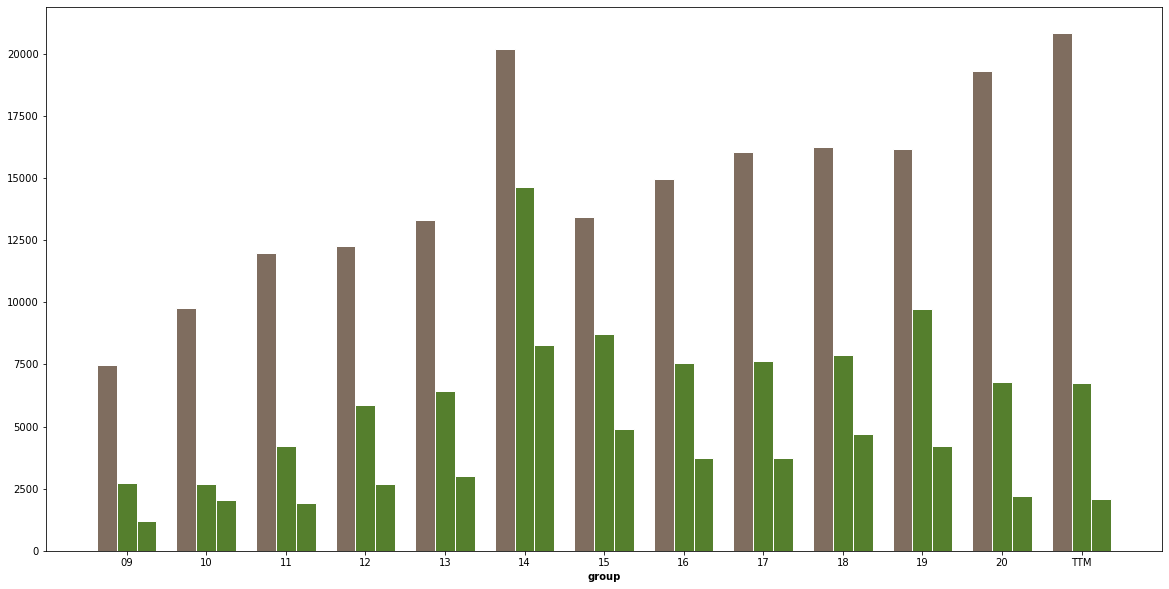

In [78]:
new_index=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
pd.concat([pl.sales,pl.opt,pl.pat],axis=1)

# set width of bar
barWidth = 0.25
plt.figure(figsize=(20,10))
 
# set height of bar
bars1 = pl.sales
bars2 = pl.opt*3.3
bars3 = pl.pat*3.3
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2] 
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Sales')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Operating Profit')
plt.bar(r3, bars3, color='#557f2d', width=barWidth, edgecolor='white', label='Net Profit')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['09', '10', '11', '12', '13','14','15','16','17','18','19','20','TTM'])
 
# Create legend & Show graphic
plt.show()



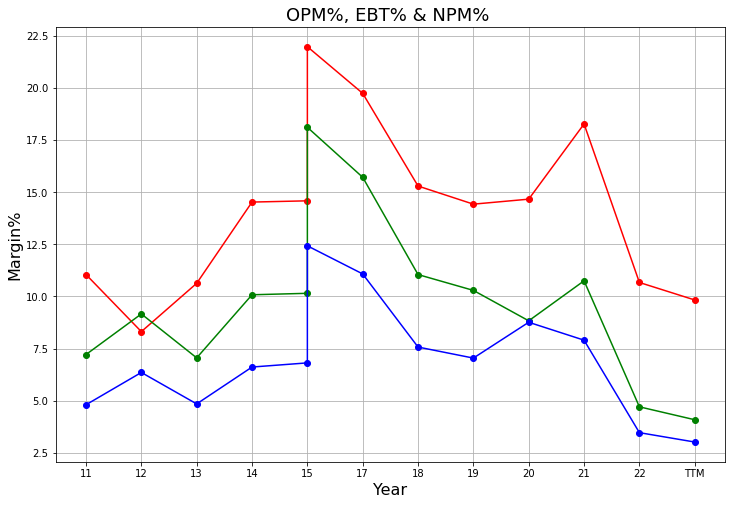

In [79]:
Year = [11,12,13,14,15,15,17,18,19,20,21,22,'TTM']
opm= list(((pl.opt/pl.sales)*100).round(2))
pbt=list(((pl.pbt/pl.sales)*100).round(2))
pat=list(((pl.pat/pl.sales)*100).round(2))

plt.figure(figsize=(12,8))
plt.plot(Year, opm, color='red', marker='o'  )
plt.plot(Year, pbt, color='green', marker='o'  )
plt.plot(Year, pat, color='blue', marker='o'  )
plt.title('OPM%, EBT% & NPM% ', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Margin%', fontsize=16)
plt.grid(True)
plt.show()

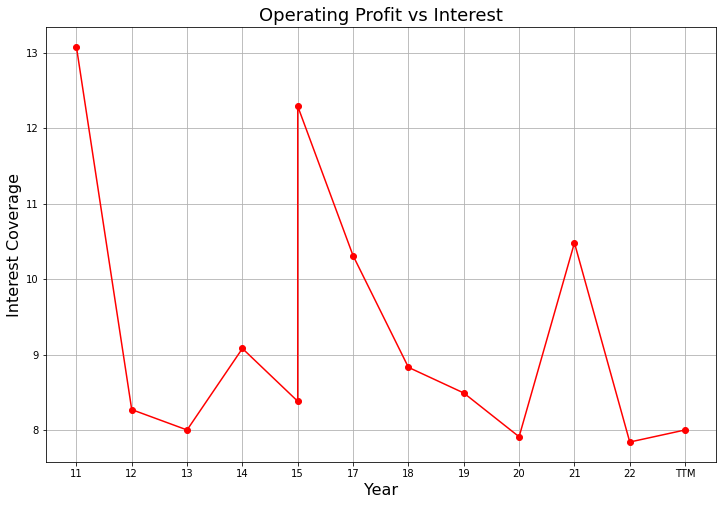

In [80]:
int_covg_list = list(interest_covg)

plt.figure(figsize=(12,8))
plt.plot(Year, int_covg_list, color='red', marker='o'  )

plt.title('Operating Profit vs Interest', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Interest Coverage', fontsize=16)
plt.grid(True)
plt.show()

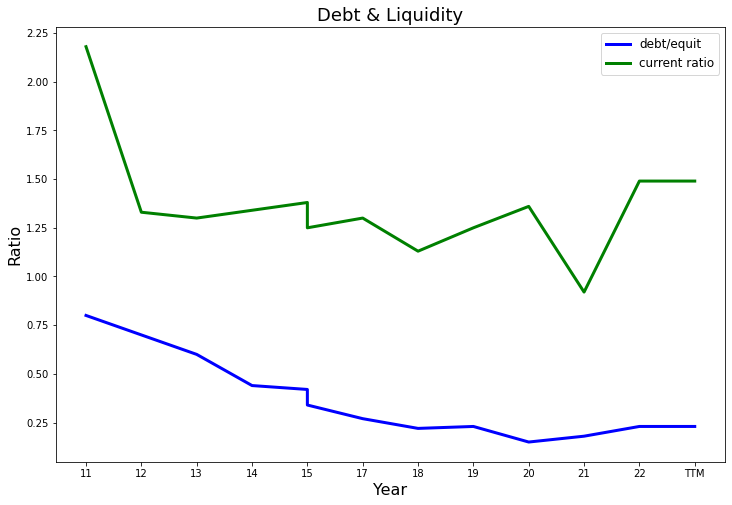

In [81]:
current_ratio=bl.oa/(bl.otl)
current_ratio=current_ratio.round(2)
crr=list(current_ratio)+[None]
d_e= list(debt_equity)
crr=list(current_ratio)
plt.figure(figsize=(12,8))
plt.plot(Year, d_e, color='blue', marker=None,linewidth=3)
plt.plot(Year, crr, color='green', marker=None,linewidth=3)

plt.title('Debt & Liquidity', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Ratio', fontsize=16,  )
plt.grid(False)
plt.legend(['debt/equit','current ratio'],fontsize=12)
plt.show()

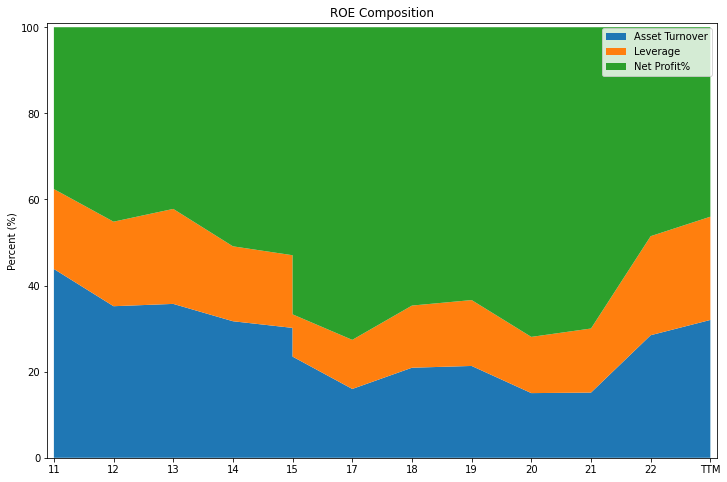

In [82]:

y = numpy.row_stack((list(nfat),list(lvg),pat))
x = numpy.array(Year)

# Make new array consisting of fractions of column-totals,
# using .astype(float) to avoid integer division
percent = y /  y.sum(axis=0).astype(float) * 100 

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.stackplot(x, percent)
ax.set_title('ROE Composition', )
ax.set_ylabel('Percent (%)')
ax.legend(['Asset Turnover','Leverage','Net Profit%'])

ax.margins(0.01, 0.01) # Set margins to avoid "whitespace"

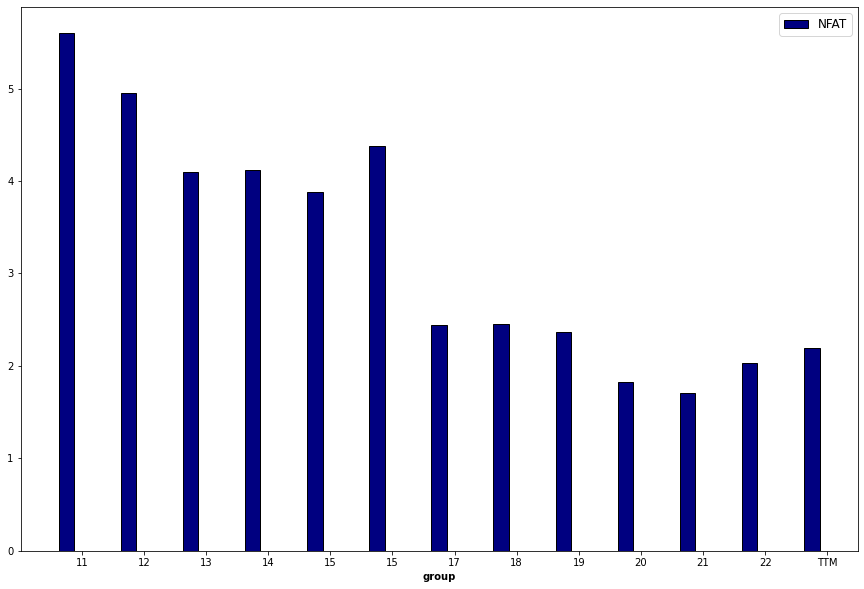

In [83]:
barWidth = 0.25
plt.figure(figsize=(15,10))
 
# set height of bar
bars1 = nfat

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#000080', width=barWidth, edgecolor='black', label='NFAT')

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], Year)
 
# Create legend & Show graphic
plt.legend(fontsize=12)
plt.show()

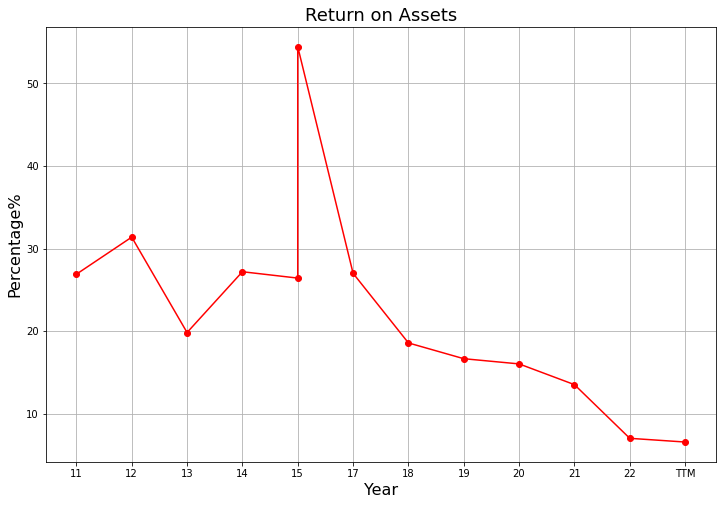

In [84]:
rofax=(((pl.pat/bl.nfa)*100).round(2))


plt.figure(figsize=(12,8))
plt.plot(Year, rofax, color='red', marker='o'  )

plt.title('Return on Assets', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Percentage%', fontsize=16)
plt.grid(True)
plt.show()